# Install dependencies

In [2]:
install.packages('tidyverse')

install.packages('janitor')

install.packages("broom")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bit’, ‘bit64’, ‘blob’, ‘DBI’, ‘cellranger’, ‘ids’, ‘vroom’, ‘tzdb’, ‘progress’, ‘broom’, ‘dbplyr’, ‘dtplyr’, ‘forcats’, ‘googledrive’, ‘googlesheets4’, ‘haven’, ‘hms’, ‘modelr’, ‘readr’, ‘readxl’, ‘reprex’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [15]:
install.packages("naniar")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘norm’, ‘visdat’, ‘UpSetR’




In [ ]:
library(tidyverse)
library(janitor)

# Data download

In [5]:
# pheno file
system("dx download file-GFbxGGjJqQqy7gVx4k9zbxJ8")

In [6]:
# summary stats
system("dx download file-GGGpfKQJqQqffYQj8FqpJGQ3")

In [9]:
# Covariates
system("dx download file-GG8FJG8JqQqjxbxx4b4ZZ6bP")

In [8]:
# scores
system("mkdir -p score")
system("dx download -o scores/ /cardiovascular-ageing/score-29k/cmri_age_delta*")

In [9]:
# Clumped snps
system("dx download -o merged/ file-GGJb34jJqQqgfQKjJVfZ6Bqq")

# Data exploration

In [7]:
pheno <- read_tsv("pheno_file.tsv") %>% clean_names()

Rows: 34133 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
dbl (3): FID, IID, pheno

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


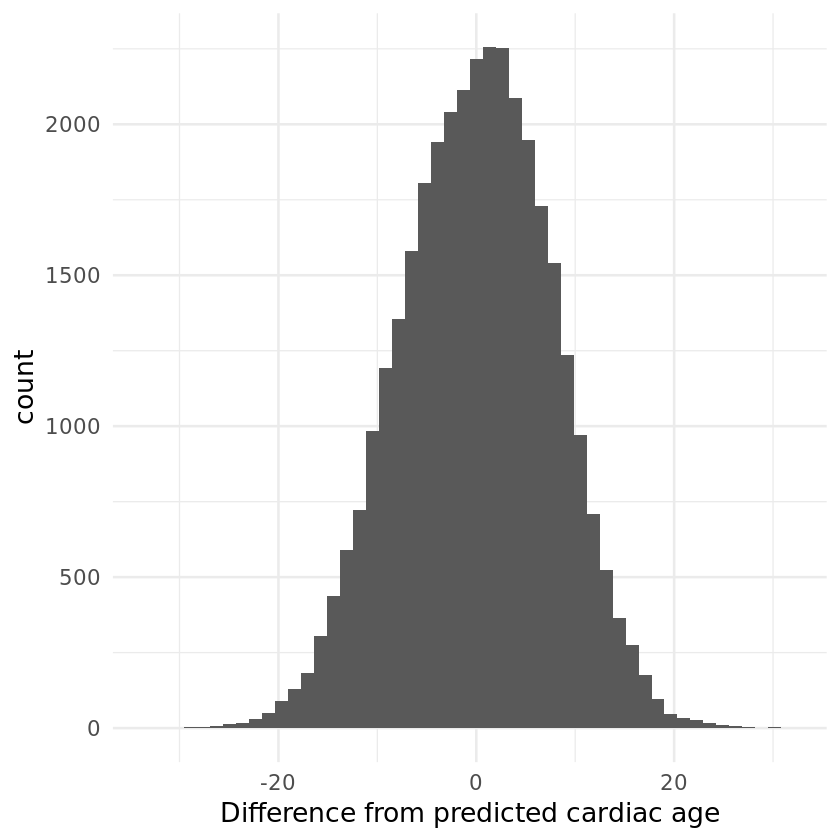

In [8]:
pheno %>% 
    ggplot() + 
    geom_histogram(aes(pheno), bins = 50) + 
    theme_minimal(base_size = 16) + 
    labs(x = "Difference from predicted cardiac age")

In [10]:
covars <- read_table("covars_short_euro.tsv") %>% clean_names() %>% select(sid, age, sex, array, centre, pc1:pc10) %>% mutate(age2 = age ^ 2)


── Column specification ────────────────────────────────────────────────────────
cols(
  SID = col_double(),
  Age = col_double(),
  Sex = col_character(),
  Centre = col_double(),
  Array = col_logical(),
  PC1 = col_double(),
  PC2 = col_double(),
  PC3 = col_double(),
  PC4 = col_double(),
  PC5 = col_double(),
  PC6 = col_double(),
  PC7 = col_double(),
  PC8 = col_double(),
  PC9 = col_double(),
  PC10 = col_double(),
  ethnicity = col_character(),
  exclude = col_logical()
)



In [11]:
pheno_all <- left_join(
    pheno %>% select(iid, pheno),
    covars, by = c("iid" = "sid"))

In [12]:
pheno_all %>% head()

iid,pheno,age,sex,array,centre,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,age2
<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000079,-0.7150187,53,Female,TRUE,11013,-13.04580,1.206100,-0.575548,-2.655670,-5.23527,1.614560,2.1900600,-2.3342700,0.5664570,-0.0279893,2809
1000409,9.9743133,55,Female,TRUE,11021,-14.50670,5.140020,-2.678270,-0.265379,-3.78186,-0.650958,-0.2464730,0.0022158,-3.3128700,-0.0685657,3025
1000532,6.8100939,51,Male,TRUE,11006,-9.70706,3.531990,0.199111,0.524223,1.99667,-1.576590,0.0637566,0.8231630,-0.1457550,1.2639700,2601
1000581,-4.8244326,54,Male,TRUE,11001,-15.40230,6.033370,-4.272680,7.535990,15.31490,-0.264488,0.0195458,1.9308700,3.0702500,-4.0578400,2916
1000686,-2.7523007,62,Female,TRUE,11009,-14.10330,4.595400,-1.075890,-0.048607,-7.70158,1.238920,1.3944000,1.6477400,1.0422100,-0.8678150,3844
1000911,-1.8931730,50,Male,TRUE,11014,-9.09961,-0.545141,-0.749274,-0.707004,-6.05249,-2.785270,2.3034800,-0.1443730,0.0403395,0.5397520,2500


In [13]:
nrow(pheno_all)

[1] 34133

Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”


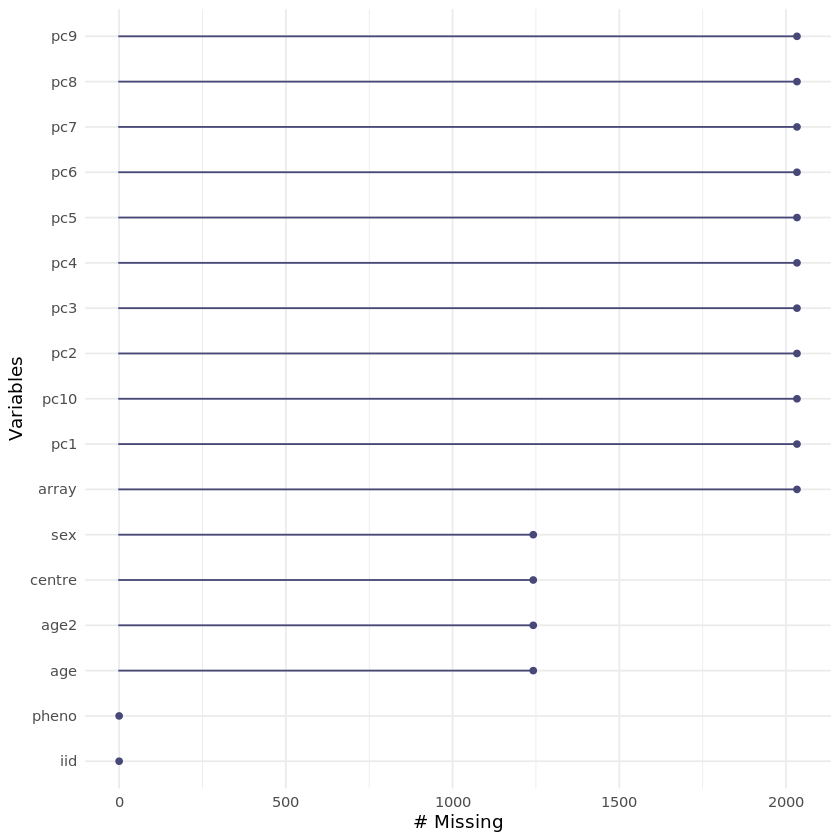

In [16]:
naniar::gg_miss_var(pheno_all)

In [17]:
null_model <- lm(pheno ~ ., data = pheno_all %>% select(-iid))
null_r2 <- summary(null_model)$r.squared

In [18]:
null_r2

[1] 0.01003021

In [19]:
broom::glance(null_model)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.01003021,0.009567373,7.613265,21.67131,7.178745e-60,15,-110699.5,221432.9,221575.3,1859647,32084,32100


In [20]:
broom::tidy(null_model)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-4.408055e+01,7.3914325933,-5.9637360,2.491115e-09
age,1.280866e+00,0.0822374255,15.5752241,1.699358e-54
sexMale,6.239243e-01,0.0854406999,7.3024246,2.891908e-13
arrayTRUE,-1.624979e-01,0.1421723103,-1.1429642,2.530620e-01
centre,8.394345e-04,0.0006407878,1.3100039,1.902039e-01
pc1,-1.977783e-02,0.0150419297,-1.3148463,1.885709e-01
pc2,-2.118519e-02,0.0156745632,-1.3515649,1.765241e-01
pc3,4.279162e-03,0.0196157457,0.2181493,8.273141e-01
pc4,1.454611e-02,0.0099133492,1.4673252,1.422974e-01


In [22]:
sumstats <- read_table("summarystats_plink_imputed_29k_european.txt") %>% clean_names()


── Column specification ────────────────────────────────────────────────────────
cols(
  Chromosome = col_double(),
  Position = col_double(),
  ID = col_character(),
  REF = col_character(),
  ALT = col_character(),
  A1 = col_character(),
  TEST = col_character(),
  OBS_CT = col_double(),
  BETA = col_double(),
  SE = col_double(),
  T_STAT = col_double(),
  P = col_double()
)



In [24]:
sumstats_clumped <- inner_join(
    read_table("merged/all.bim", col_names = c("chromosome", "id", "group", "position", "alt", "ref")) %>% clean_names(), 
    sumstats, 
    by = c("id", "chromosome", "position", "ref", "alt"))


── Column specification ────────────────────────────────────────────────────────
cols(
  chromosome = col_double(),
  id = col_character(),
  group = col_double(),
  position = col_double(),
  alt = col_character(),
  ref = col_character()
)



In [25]:
top_variants <- sumstats_clumped %>% arrange(p) %>% head(n = 100)

In [26]:
head(top_variants)

chromosome,id,group,position,alt,ref,a1,test,obs_ct,beta,se,t_stat,p
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,rs7795735,0,73429482,A,T,A,ADD,29506,0.462746,0.0635802,7.27814,3.46899e-13
10,rs61886308,0,95905866,A,G,A,ADD,29506,0.557483,0.0834500,6.68045,2.42444e-11
10,rs2986036,0,105247817,C,T,C,ADD,29506,-0.364030,0.0634031,-5.74152,9.47517e-09
8,rs1991860,0,75737818,T,C,T,ADD,29506,-0.366672,0.0642676,-5.70538,1.17192e-08
2,rs2042995,0,179558366,C,T,C,ADD,29506,0.429256,0.0754152,5.69190,1.26823e-08
3,rs698097,0,186987735,A,G,G,ADD,29506,0.450693,0.0842807,5.34752,8.98295e-08


In [27]:
system("mkdir -p results")

In [28]:
top_variants %>% write_csv("results/top_variants.csv")

# Choose the best PRS cutoff

In [29]:
p_thresholds <- read_table(
    "range_list.txt", 
    col_names = c("name", "from", "to"), 
    col_types = "cdd")

In [31]:
prs_selection <- map_dfr(p_thresholds$name, function(thresh) {
    score <- read_table(
        paste0("scores/cmri_age_delta.", thresh, ".sscore"), show_col_types = F) %>% clean_names()  
    score_df <- inner_join(pheno_all, score %>% select(iid, score1_avg), by = "iid")
    score_model <- lm(pheno ~ ., data = score_df %>% select(-iid))
    threshold <- as.double(thresh)
    coeff <- broom::tidy(summary(score_model)) %>% filter(term == "score1_avg")
    r2 <- broom::glance(summary(score_model))$r.squared
    list(
        threshold = threshold,
        r2 = r2,
        n_snps = sum(sumstats_clumped$p < threshold),
        delta_r2 = r2 - null_r2,
        beta = coeff$estimate,
        se = coeff$std.error,
        p = coeff$p.value,
        log10p = log10(coeff$p.value)
    )   
})
    

In [32]:
prs_selection

threshold,r2,n_snps,delta_r2,beta,se,p,log10p
<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-06,0.02145304,13,0.01142283,23.06727,1.191963,5.795273e-83,-82.23693
1e-05,0.03903638,45,0.02900617,77.78074,2.499441,1.733868e-209,-208.76098
1e-04,0.12229301,284,0.11226281,417.26324,6.513726,0.000000e+00,-Inf
1e-03,0.36202286,1845,0.35199265,1802.57531,13.548515,0.000000e+00,-Inf
1e-02,0.66835188,13592,0.65832168,5102.65215,20.219861,0.000000e+00,-Inf


In [33]:
prs_selection %>% write_csv("results/prs_selection.csv")

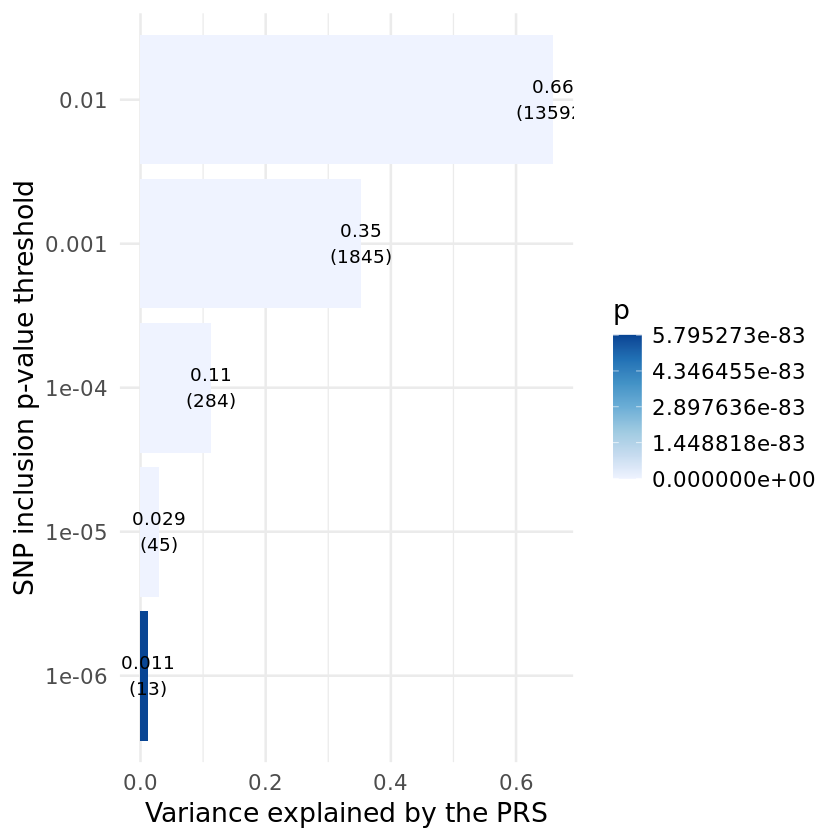

In [45]:
prs_selection %>% 
    mutate(threshold = as.factor(threshold)) %>%
    ggplot() +
    geom_col(aes(x = delta_r2, y = threshold, fill = p)) +
    geom_text(aes(
        x = delta_r2, 
        y = threshold, 
        label = paste0(signif(delta_r2, 2), "\n(", n_snps, ")"))) +
    scale_fill_distiller(direction = "reverse") +
    labs(y = "SNP inclusion p-value threshold", x = "Variance explained by the PRS") +
    theme_minimal(base_size = 16)

In [46]:
ggsave("results/r2_selection.png", width = 8, height = 6)

Will use p-threshold of 1e-4 due to high R2 and (relatively) low number of SNPs used (284).

# Get adjusted cMRI age

Do this for $1\times10^{-3}$ and $1\times10^{-5}$

In [86]:
p_threshold <- "1e-5"
score <- read_table(paste0("scores/cmri_age_delta.", p_threshold, ".sscore"), show_col_types = F) %>% clean_names()

In [87]:
train_df <- inner_join(pheno_all, score %>% select(iid, score1_avg), by = "iid")
score_model <- lm(pheno ~ ., data = train_df %>% select(-iid))

In [88]:
train_prs <- broom::augment(score_model)

In [89]:
head(train_prs)

.rownames,pheno,age,sex,array,centre,pc1,pc2,pc3,pc4,⋯,pc9,pc10,age2,score1_avg,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<chr>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.7150187,53,Female,TRUE,11013,-13.04580,1.206100,-0.575548,-2.655670,⋯,0.5664570,-0.0279893,2809,-0.0231874,-2.4033904,1.688372,0.0003832098,7.501129,1.142921e-06,0.2251288
2,9.9743133,55,Female,TRUE,11021,-14.50670,5.140020,-2.678270,-0.265379,⋯,-3.3128700,-0.0685657,3025,0.0160227,0.5077504,9.466563,0.0001737776,7.500949,1.628696e-05,1.2621467
3,6.8100939,51,Male,TRUE,11006,-9.70706,3.531990,0.199111,0.524223,⋯,-0.1457550,1.2639700,2601,0.0185619,1.2800021,5.530092,0.0001621723,7.501072,5.186721e-06,0.7373053
4,-4.8244326,54,Male,TRUE,11001,-15.40230,6.033370,-4.272680,7.535990,⋯,3.0702500,-4.0578400,2916,0.0205971,2.1420099,-6.966443,0.0003781187,7.501034,1.919948e-05,-0.9289086
5,-2.7523007,62,Female,TRUE,11009,-14.10330,4.595400,-1.075890,-0.048607,⋯,1.0422100,-0.8678150,3844,0.0136571,-0.1658855,-2.586415,0.0001636574,7.501121,1.144946e-06,-0.3448368
6,-1.8931730,50,Male,TRUE,11014,-9.09961,-0.545141,-0.749274,-0.707004,⋯,0.0403395,0.5397520,2500,0.0370281,2.5525747,-4.445748,0.0003117697,7.501094,6.446219e-06,-0.5927783


In [90]:
pheno_prs_cor <- cor(train_prs$pheno, train_prs$.fitted, method = "spearman", use = "complete.obs")

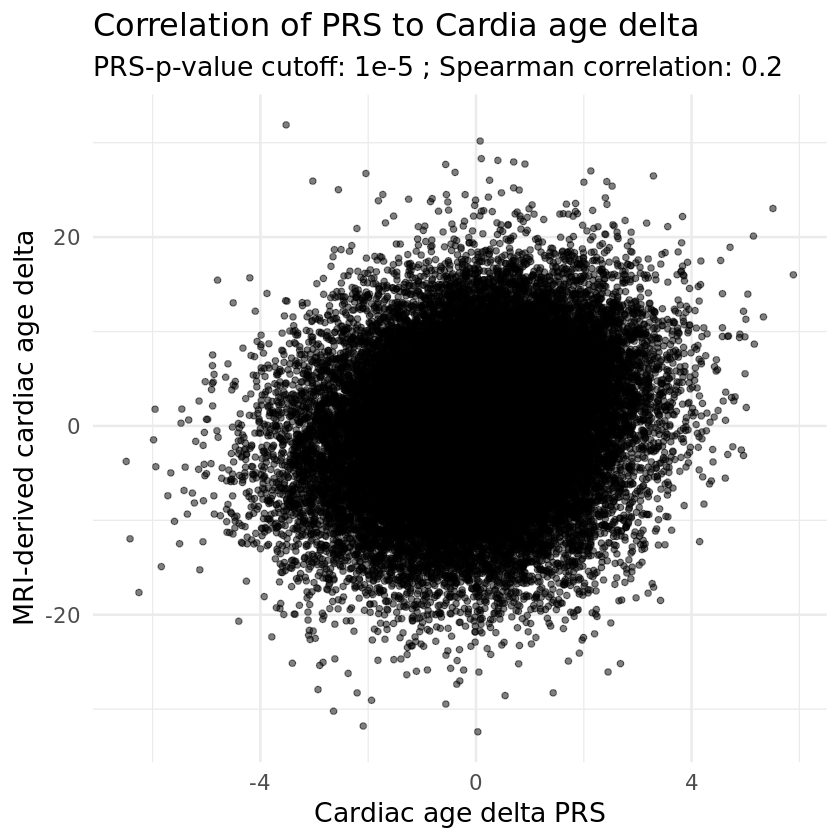

In [91]:
ggplot(train_prs) + 
    geom_point(aes(x = .fitted, y = pheno), alpha = 0.5) + 
    labs(
        x = "Cardiac age delta PRS", 
        y = "MRI-derived cardiac age delta", 
        title = "Correlation of PRS to Cardia age delta", 
        subtitle = paste("PRS-p-value cutoff:", p_threshold, "; Spearman correlation:", signif(pheno_prs_cor, 2))) +
    theme_minimal(base_size = 16)

In [92]:
ggsave(paste0("results/predicted_cmri_age_delta_prs_", p_threshold, ".png"), width = 8, height = 6)

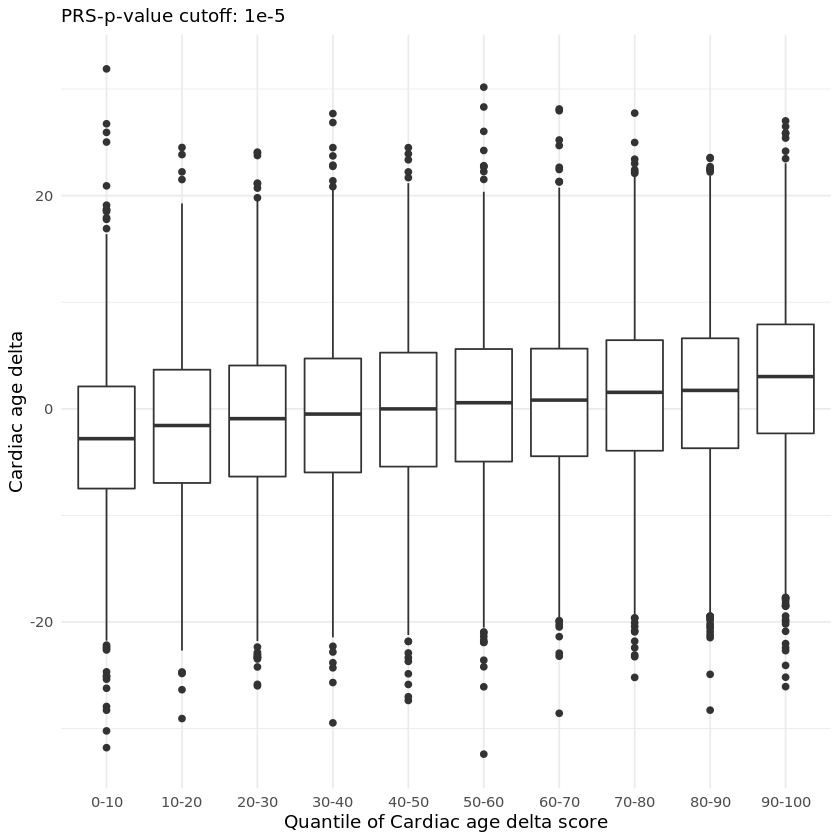

In [93]:
prs_quantiles <- quantile(train_prs$.fitted, probs = seq(0, 1, 0.1))
quantile_names <- paste(seq(0, 90, 10), seq(10, 100, 10), sep="-")
train_prs %>%
    mutate(quantile = cut(train_prs$.fitted, breaks = prs_quantiles, labels = quantile_names)) %>%
    filter(!is.na(quantile)) %>%
    ggplot() +
    geom_boxplot(aes(x = quantile, y = pheno)) +
    labs(
        x = "Quantile of Cardiac age delta score", 
        y = "Cardiac age delta", 
        subtitle = paste("PRS-p-value cutoff:", p_threshold)) +
    theme_minimal()

In [94]:
ggsave(paste0("results/predicted_cmri_age_delta_prs_quantiles_", p_threshold, ".png"), width = 8, height = 6)

# Export PRS for each individual

In [95]:
test_df <- inner_join(score, covars, by = c("iid" = "sid")) %>% filter(iid > 0)

nrow(test_df)

[1] 457805

In [96]:
head(test_df)

number_fid,iid,allele_ct,named_allele_dosage_sum,score1_avg,age,sex,array,centre,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,age2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000018,1000018,90,13,0.00277159,49,Female,TRUE,11013,-9.18879,1.75129,-1.058100,-6.96602,-6.44238,0.766830,3.011160,2.662670,1.99129,2.190660,2401
1000020,1000020,90,19,0.02137900,46,Male,TRUE,11011,-11.12480,2.46335,-1.999240,2.12954,6.05685,0.384488,-0.105639,3.120070,-3.59282,2.496100,2116
1000037,1000037,88,21,0.03377750,62,Female,TRUE,11013,-12.61970,1.30501,-2.997550,-2.56583,-7.61619,1.540700,3.919420,0.503051,1.10758,0.448285,3844
1000043,1000043,90,21,0.01020370,66,Female,FALSE,11011,-11.69960,2.92726,-1.149300,2.62659,2.66120,-1.622850,0.986303,-1.254550,4.62053,-2.895230,4356
1000051,1000051,90,22,0.01389940,51,Female,TRUE,11016,-11.26990,6.93590,-0.313525,-1.73477,-3.16510,-0.846349,0.470775,-2.308400,-3.22621,1.190670,2601
1000066,1000066,90,18,-0.01961280,59,Male,FALSE,11006,-13.29380,6.49955,-0.989216,-1.08662,-9.52627,0.805024,3.679120,-2.360470,1.35180,-0.439134,3481


In [97]:
pred_cmri_age_delta <- predict(score_model, test_df)

In [98]:
head(pred_cmri_age_delta)

1           2           3           4           5           6 
-0.94316299  0.86121743  1.45205135 -0.84418442  0.07929879 -1.60245820

In [99]:
is.na(pred_cmri_age_delta) %>% sum()

[1] 0

In [100]:
prs_pred <- tibble(iid = test_df$iid, pred_cmri_age_delta)

In [101]:
write_csv(prs_pred, paste0("results/prs_pred_", p_threshold, ".csv"))

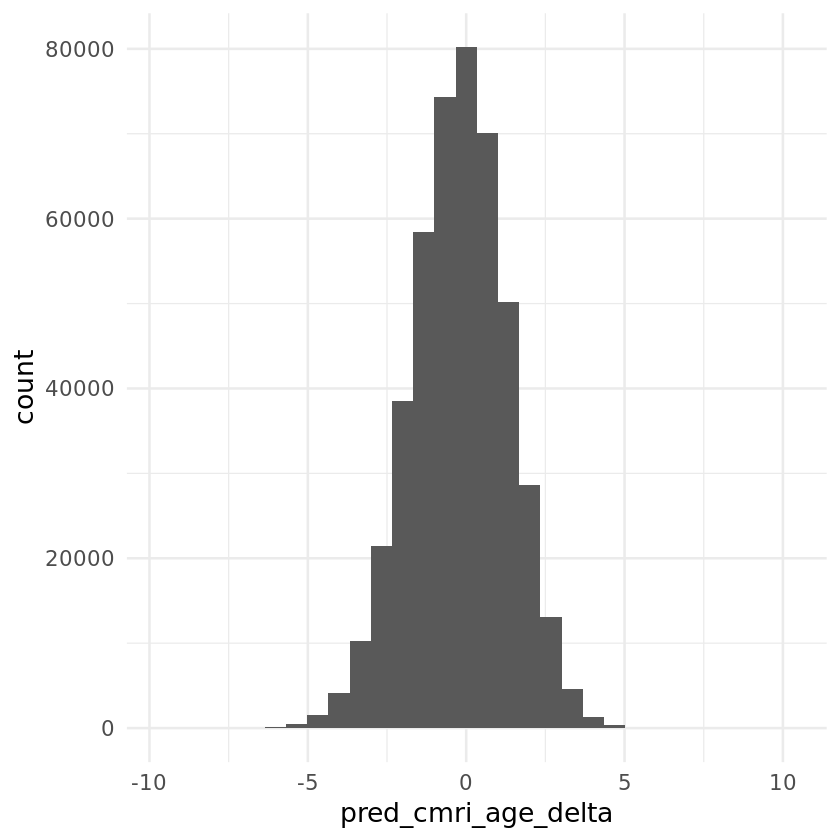

In [102]:
ggplot(prs_pred) + 
    geom_histogram(aes(pred_cmri_age_delta), bins = 30) + 
    theme_minimal(base_size = 16) + 
    labs("Predicted difference in caridac age")